In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
%matplotlib inline

2025-03-12 10:24:03.568046: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-12 10:24:03.603835: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1741755243.642246   23364 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741755243.656540   23364 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-12 10:24:03.698292: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [3]:
from keras.datasets import mnist

# Load the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Print the shape of the dataset
print(f'Training data shape: {x_train.shape}, Training labels shape: {y_train.shape}')
print(f'Test data shape: {x_test.shape}, Test labels shape: {y_test.shape}')

Training data shape: (60000, 28, 28), Training labels shape: (60000,)
Test data shape: (10000, 28, 28), Test labels shape: (10000,)


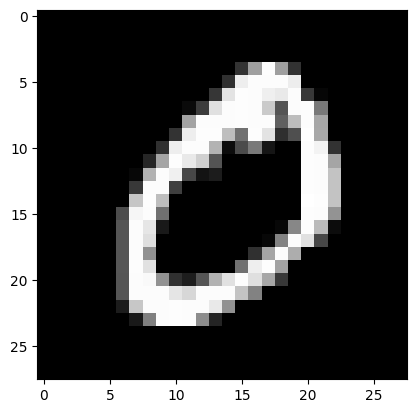

In [4]:
plt.imshow(x_train[1], cmap='gray')
plt.show()

In [5]:
input_shape = x_train.shape[1:]
print(f'Input shape: {input_shape}')

Input shape: (28, 28)


In [7]:
model = keras.Sequential([
    # tf.keras.Input(shape=(784,)),
    tf.keras.layers.InputLayer(shape=(28, 28)),
    tf.keras.layers.Reshape((28, 28, 1)),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [8]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ reshape_1 (Reshape)             │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
)

history = model.fit(
    x_train,y_train,validation_split=0.2,
    batch_size=32,
    callbacks=[
        tf.keras.callbacks.ModelCheckpoint(filepath='Handwritten-digits.weights.h5', save_weights_only=True, save_best_only=True, monitor='val_loss', mode='min'),
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    ],
    epochs=40
)

Epoch 1/40


/home/yaswanth/anaconda3/lib/python3.12/site-packages/keras/src/backend/tensorflow/nn.py:708: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 33s 20ms/step - loss: 2.2786 - val_loss: 0.0712
Epoch 2/40
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 30s 20ms/step - loss: 0.1265 - val_loss: 0.0538
Epoch 3/40
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 30s 20ms/step - loss: 0.0865 - val_loss: 0.0493
Epoch 4/40
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 31s 21ms/step - loss: 0.0784 - val_loss: 0.0524
Epoch 5/40
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 33s 22ms/step - loss: 0.0639 - val_loss: 0.0524
Epoch 6/40
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - loss: 0.0573 - val_loss: 0.0572
Epoch 7/40
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - loss: 0.0500 - val_loss: 0.0492
Epoch 8/40
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 33s 22ms/step - loss: 0.0435 - val_loss: 0.0572
Epoch 9/40
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 33s 22ms/step - loss: 0.0467 - val_loss: 0.0666
Epoch 10/40
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 29s 19ms/step - loss: 0.0439 - val_loss: 0.0440
Epoch 11/40
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 30s 20ms/step - loss: 0.0395 - val_loss: 0.0494
Epoch 12/40
1500/15

In [13]:
tf.keras.models.save_model(model, 'Handwritten-digits.model.keras')

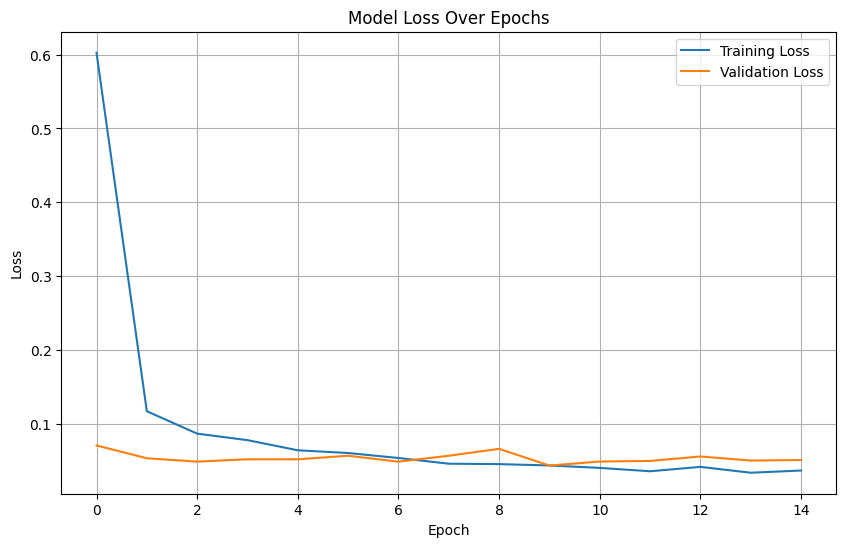

<Figure size 640x480 with 0 Axes>

In [21]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

plt.savefig('training_validation_loss.png')

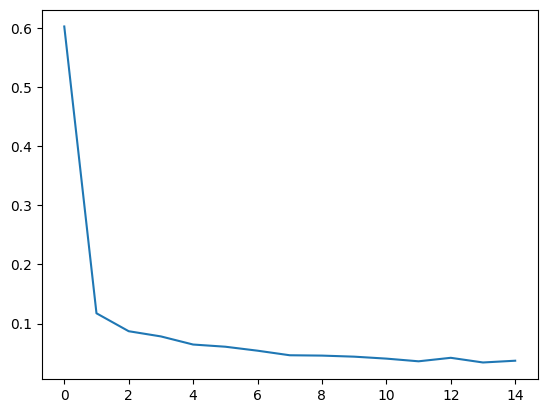

In [15]:
plt.plot(history.history['loss'], label='train loss')
plt.show()

In [16]:
model.evaluate(x_test,y_test)

  1/313 ━━━━━━━━━━━━━━━━━━━━ 1:34 303ms/step - loss: 0.1063

/home/yaswanth/anaconda3/lib/python3.12/site-packages/keras/src/backend/tensorflow/nn.py:708: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0431


0.03429931774735451

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
Predicted class: 7


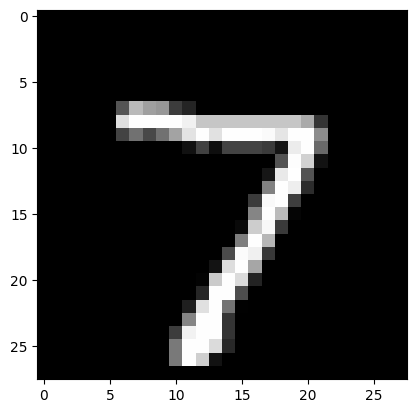

In [17]:
print(f'Predicted class: {np.argmax(model.predict(x_test[0:1]))}')
plt.imshow(x_test[0], cmap='gray')
plt.show()

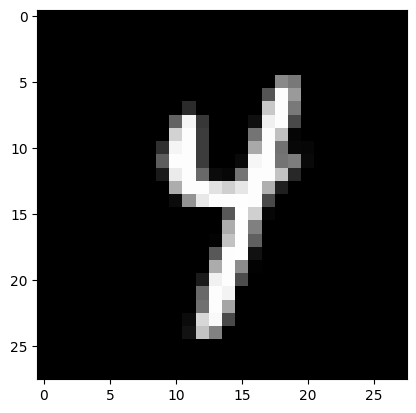

In [18]:
plt.imshow(x_test[1015], cmap='gray')
plt.show()

In [19]:
image_of_two = x_test[1015]
image_of_two = np.expand_dims(image_of_two, axis=0)  # Expand dimensions to match the input shape

prediction = model.predict(image_of_two)  # prediction

print(f" predicting a Four: \n{prediction}")
print(f" Largest Prediction index: {np.argmax(prediction)}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
 predicting a Four: 
[[2.8137468e-17 4.9183921e-12 5.3539404e-14 1.8266009e-17 9.9999869e-01
  7.2996963e-13 8.1467670e-14 9.5114394e-12 1.3545544e-09 1.3628620e-06]]
 Largest Prediction index: 4


In [23]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

loss, accuracy = model.evaluate(x_test, y_test)
print(f'Accuracy: {accuracy * 100:.2f}%')

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9876 - loss: 0.0431
Accuracy: 99.05%
